In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('store.csv',index_col=0)

In [3]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()
rev['month'] = rev.index.month_name()
rev['year'] = rev.index.year

In [5]:
df['revenue'] = df.sale_amount*df.item_price

In [6]:
rev = df.groupby('sale_date')[['revenue']].sum()

In [7]:
rev.head()

,revenue
sale_date,
2013-01-01,73844.01
2013-01-02,73570.58
2013-01-03,78169.48
2013-01-04,84467.73
2013-01-05,87621.85


In [8]:
rev['shift_week'] = rev.revenue.shift(-7)
rev['shift_month'] = rev.revenue.shift(-30)
rev['shift_half_year'] = rev.revenue.shift(-182)

In [9]:
rev.head()

,revenue,shift_week,shift_month,shift_half_year
sale_date,,,,
2013-01-01,73844.01,72994.66,79237.27,139006.90
2013-01-02,73570.58,75133.92,94066.76,139195.12
2013-01-03,78169.48,78991.19,98943.56,148207.22
2013-01-04,84467.73,84400.09,104593.10,157551.04
2013-01-05,87621.85,89426.70,70131.45,167910.51


<AxesSubplot:>

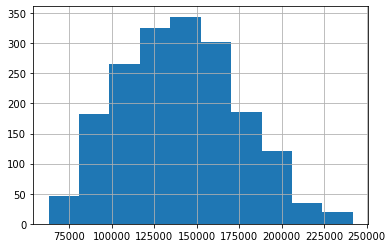

In [10]:
rev.revenue.hist()

In [11]:
rev.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='sale_date', length=1826, freq=None)

<AxesSubplot:xlabel='sale_date'>

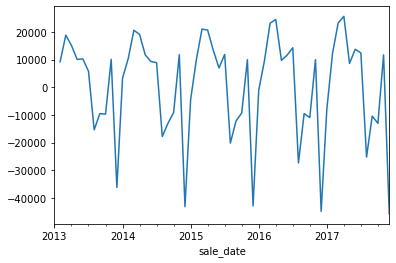

In [13]:
rev.revenue.resample('M').mean().diff().plot()

In [19]:
rev['diff']  = rev.revenue.diff()

In [23]:
rev[rev['diff']<-30000]

,revenue,shift_week,shift_month,shift_half_year,diff
sale_date,,,,,
2013-01-14,63034.32,62788.62,81673.71,118172.69,-32175.79
2013-01-21,62788.62,63666.67,79932.06,118477.74,-32042.25
2013-01-28,63666.67,70131.45,80708.15,117409.35,-30959.62
2013-02-04,70131.45,69654.17,99101.46,105453.35,-34461.65
2013-02-11,69654.17,69613.02,99053.75,104931.14,-35333.85
...,...,...,...,...,...
2017-12-01,126459.23,125465.55,140905.74,NaN,-38586.57
2017-12-04,93891.60,94813.98,NaN,NaN,-48397.89
2017-12-11,94813.98,95208.99,NaN,NaN,-47628.01


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='month'>

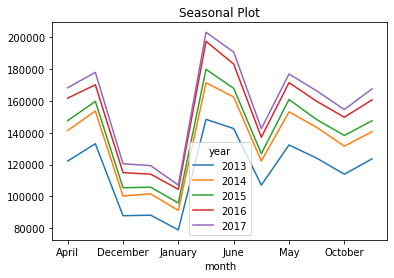

In [27]:

rev.revenue.groupby([rev.year, rev.month]).mean().unstack(0).plot(title='Seasonal Plot')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

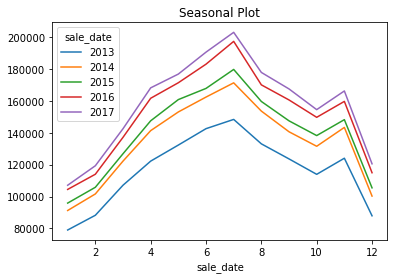

In [29]:
rev.revenue.groupby([rev.index.year, rev.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

<AxesSubplot:xlabel='sale_date'>

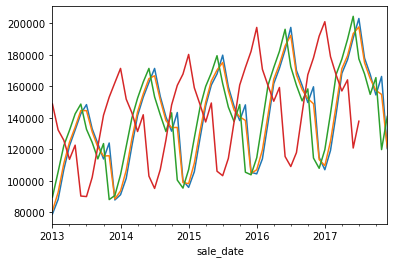

In [36]:
rev.revenue.resample('M').mean().plot()
rev.shift_week.resample('M').mean().plot()
rev.shift_month.resample('M').mean().plot()
rev.shift_half_year.resample('M').mean().plot()

In [31]:
rev.head()

,revenue,shift_week,shift_month,shift_half_year,diff,month,year
sale_date,,,,,,,
2013-01-01,73844.01,72994.66,79237.27,139006.90,NaN,January,2013
2013-01-02,73570.58,75133.92,94066.76,139195.12,-273.43,January,2013
2013-01-03,78169.48,78991.19,98943.56,148207.22,4598.90,January,2013
2013-01-04,84467.73,84400.09,104593.10,157551.04,6298.25,January,2013
2013-01-05,87621.85,89426.70,70131.45,167910.51,3154.12,January,2013


Text(0, 0.5, 'revenue in a month')

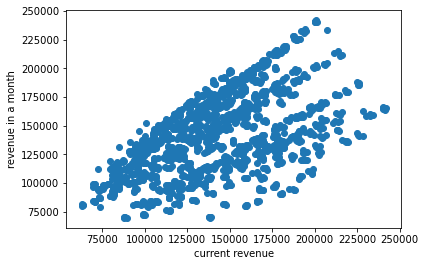

In [38]:
plt.scatter(rev.revenue,rev.shift_month)
plt.xlabel('current revenue')
plt.ylabel('revenue in a month')

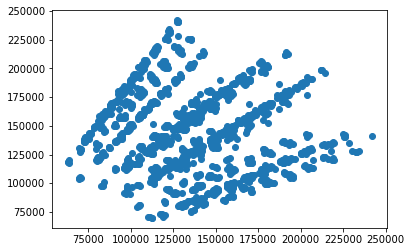

In [39]:
plt.scatter(rev.revenue,rev.shift_half_year)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

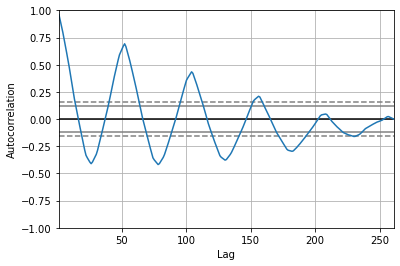

In [40]:
pd.plotting.autocorrelation_plot(rev.revenue.resample('W').mean())


In [42]:
import statsmodels.api as sm
y = rev.revenue.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,81794.583333,NaN,-39546.987151,NaN
2013-01-13,79990.601429,NaN,-41411.171921,NaN
2013-01-20,78973.360000,NaN,-41813.217384,NaN
2013-01-27,79272.691429,NaN,-42047.601887,NaN
2013-02-03,83792.507143,NaN,-41060.050472,NaN


<AxesSubplot:xlabel='sale_date'>

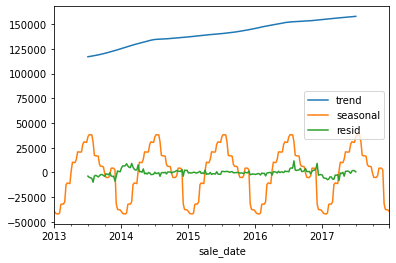

In [43]:
decomposition.iloc[:, 1:].plot()